# Метод отжига

## Импорт библиотек

In [1]:
import networkx as nx
from math import e

## Значения по заданию 13.1

In [2]:
distances = [(1, 2, 20),
            (1, 3, 40),
            (1, 4, 42),
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] # длины рёбер

V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)] # последовательность замен вершин
P = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счёта

T = 100 # начальная температура

## Функции по заданию

In [3]:
# функция вероятности
def probability(delta, T):
     return 100 * e ** (-delta / T)

# функция изменения температуры
def reductTemp(prevT):
     nextT = 0.5 * prevT

     return nextT

## Отрисовка графика по заданным вершинам

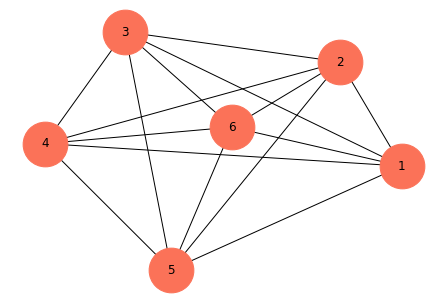

In [4]:
graph = nx.Graph() # создание пустого графа

graph.add_weighted_edges_from(distances) # добавление весов рёбер

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True) # отрисовка графа с заданными вершинами

## Функции для МО

In [5]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

# вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин
    
    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов
        
        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности

            # если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T) # вычисление температуры

    return V, arrSum

# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер

    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True) # отрисовка графа с заданными вершинами

## Нахождение лучшего маршрута и его длины

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


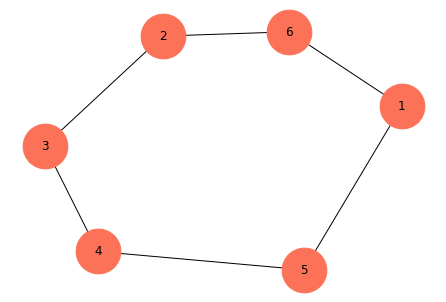

In [6]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута